In [897]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


In [898]:
# ignore FutrueWarning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [899]:
# constants
init_w = np.array([0.0, 0.0, 0.0, 0.0])

np.random.seed(123)
plt.rcParams["figure.figsize"] = (18, 10)

In [900]:
# gradient descent functions
def initialize_weights():
    return init_w

def predict(x, weights):
    return np.dot(x, weights)   

def compute_cost(y, y_hat):
    return np.mean((y_hat - y)**2) / 2

def compute_gradient(x, y, y_hat, learning_rate):
    return np.mean(x.T * (y_hat - y), axis=1) * learning_rate

def update_weights(weight, gradient):
    return weight - gradient 

def grad_descent(x, y, learning_rate, num_iterations):
    weights = initialize_weights()
    cost_history = []
    
    for _ in range(num_iterations):
        y_hat = predict(x, weights)
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        gradient = compute_gradient(x, y, y_hat, learning_rate)
        weights = update_weights(weights, gradient)
    return weights, cost_history

def plot_costs(cost_history, learning_rate):
    plt.scatter(
        x=range(len(cost_history)),
        y=cost_history
    )
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations, Learning Rate={}'.format(learning_rate))
    plt.yticks(np.arange(0, round(max(cost_history)), step=0.05))
    plt.tight_layout()
    plt.show()

In [901]:
# import raw data

raw_data = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
raw_data.columns = [col.lower() for col in raw_data.columns]

raw_data.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [902]:
# standardization functions

def scale(unscaled, feature='sales'):
    scaled_data = (unscaled - raw_data[feature].mean()) / raw_data[feature].std()
    return scaled_data

def calculate_orig(scaled, feature='sales'):
    calculated_original = scaled * raw_data[feature].std() + raw_data[feature].mean()
    return calculated_original

In [903]:
# scale data

scaled_data = raw_data.copy()

for col in raw_data.columns:
    scaled_data[col] = raw_data[col].apply(lambda x: scale(x, feature=col))

scaled_data.head()

,tv,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [904]:
# insert bias term

data = scaled_data.copy()
data.insert(0, 'bias', 1)
data.head()

,bias,tv,radio,newspaper,sales
0,1,0.967425,0.979066,1.774493,1.548168
1,1,-1.194379,1.080097,0.667903,-0.694304
2,1,-1.512360,1.524637,1.779084,-0.905135
3,1,0.051919,1.214806,1.283185,0.858177
4,1,0.393196,-0.839507,1.278593,-0.215143


In [905]:
# divide data into training (.75) and testing (.25) sets

random_state = np.random.RandomState(0)

x = data.drop('sales', axis=1)  # predictors
y = data['sales']               # response

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_state)

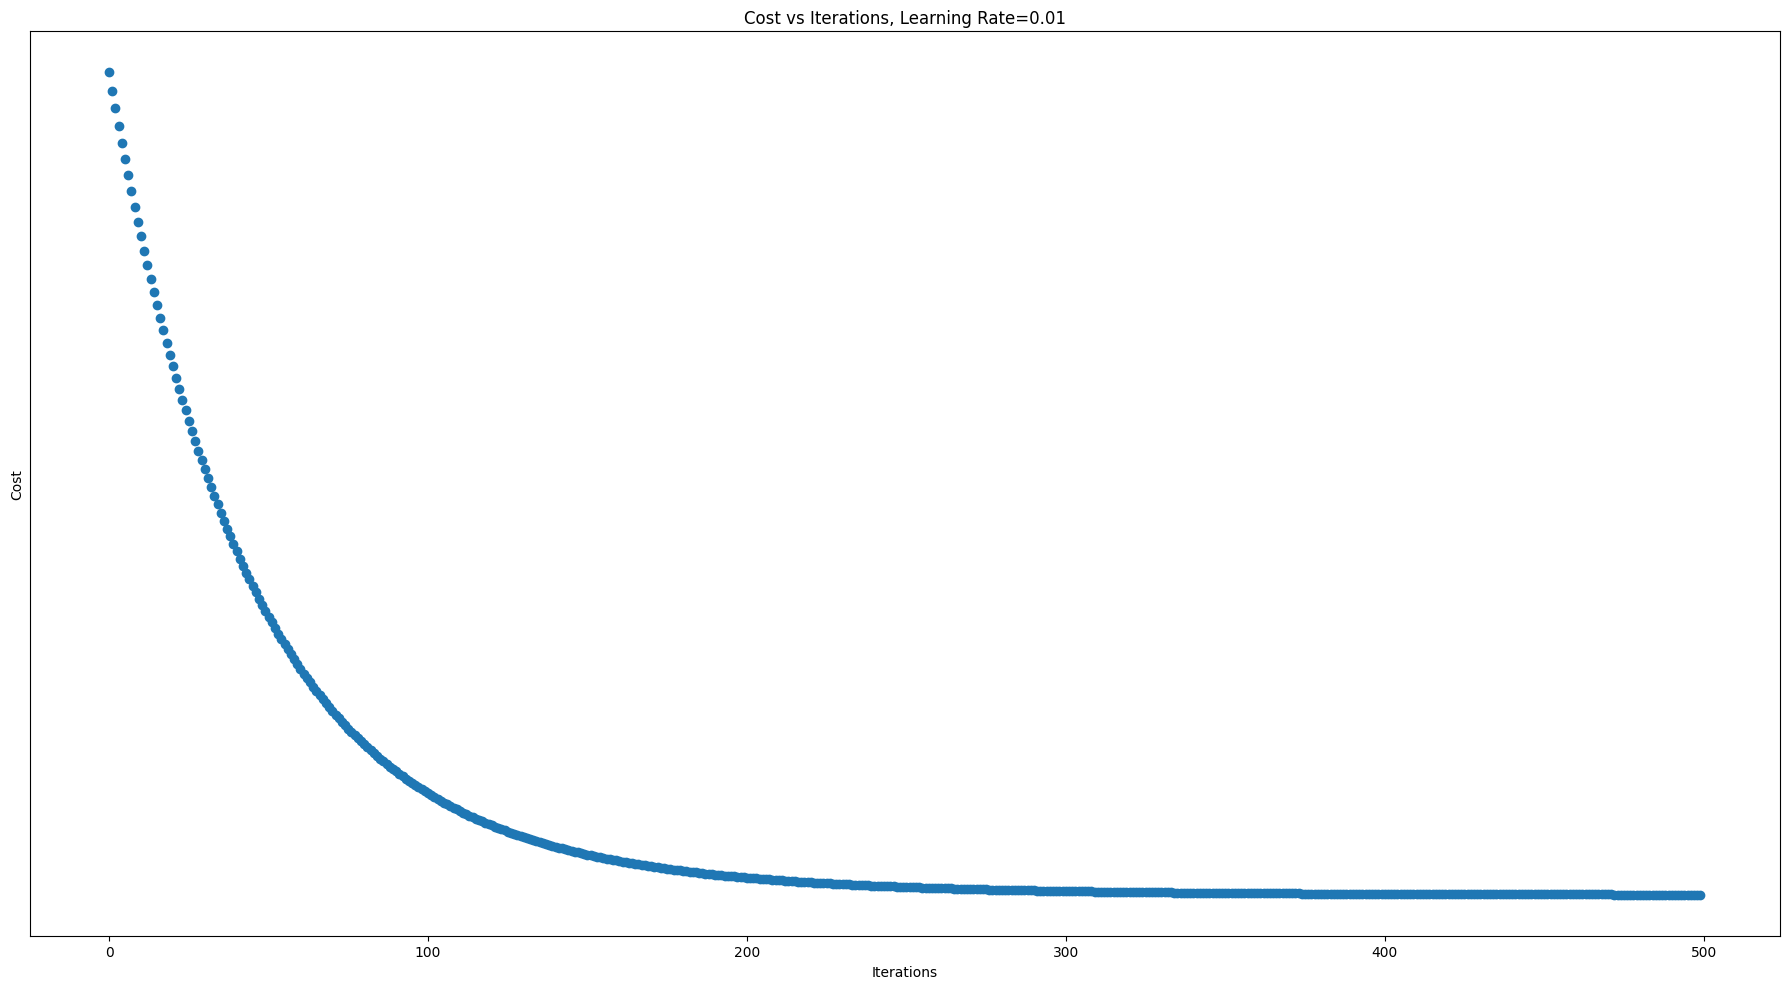

In [906]:
# parameters
num_iterations = 500
learning_rate = 0.01

# run gradient descent
weights, cost_history = grad_descent(x_train, y_train, learning_rate, num_iterations)
plot_costs(cost_history, learning_rate)

In [907]:
print('TRAIN SET')

y_train_pred = predict(x_train, weights)
mse_train = compute_cost(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'first 5 pred: {calculate_orig(y_train_pred[:5])}')
print(f'first 5 real: {calculate_orig(y_train[:5].values)}')
print(f'mse: {mse_train}')
print(f' r2: {r2_train}')

print('\nTEST SET')

y_test_pred = predict(x_test, weights)
mse_test = compute_cost(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'first 5 pred: {calculate_orig(y_test_pred[:5])}')
print(f'first 5 real: {calculate_orig(y_test[:5].values)}')
print(f'mse: {mse_test}')
print(f' r2: {r2_test}')

TRAIN SET
first 5 pred: [10.69822594 19.64363512 18.34343863 15.23854268 10.04886318]
first 5 real: [12.4 19.7 17.6 15.5 10.1]
mse: 0.04493366246094758
 r2: 0.9069353901540563

TEST SET
first 5 pred: [10.07223656  7.49636043  7.07619704 24.11399456 12.08235051]
first 5 real: [11.3  8.4  8.7 25.4 11.7]
mse: 0.07456026667541599
 r2: 0.8559778373874033


## 1.

### Plug it into the linear model:
##### <center> h_theta(x) = theta_0 + theta_1*TV + theta_2*Radio + theta_3*Newspaper </center>

In [908]:
bias = weights[0]
tv = weights[1]
radio = weights[2]
newspaper = weights[3]

print(f'weights: \n{weights}')
print(f'\nh_theta(x) = {bias} + {tv}*TV + {radio}*Radio + {newspaper}*Newspaper')

index = 4
sample = data.iloc[index]

print('\nSAMPLE')
print(sample[:4])

print('\nSTANDARDIZED')
h_theta = bias + tv * sample['tv'] + radio * sample['radio'] + newspaper * sample['newspaper']

print(f'pred: {h_theta}')
print(f'real: {data['sales'].iloc[index]}')

print('\nCALCULATED ORIGINAL')
print(f'pred: {calculate_orig(h_theta)}')
print(f'real: {raw_data['sales'].iloc[index]}')

weights: 
bias         0.008952
tv           0.718347
radio        0.555752
newspaper    0.020086
dtype: float64

h_theta(x) = 0.008952341226575783 + 0.718346701230659*TV + 0.5557515665788421*Radio + 0.02008571531554078*Newspaper

SAMPLE
bias         1.000000
tv           0.393196
radio       -0.839507
newspaper    1.278593
Name: 4, dtype: float64

STANDARDIZED
pred: -0.1494728226960371
real: -0.21514314223086323

CALCULATED ORIGINAL
pred: 13.242632039829283
real: 12.9


In [909]:
print('MEAN ADS')
print(f'pred: {calculate_orig(bias)}')
print(f'real: {raw_data['sales'].mean()}')

print('\nNO ADS')
no_tv = scale(0, 'tv')
no_radio = scale(0, 'radio')
no_newspaper = scale(0, 'newspaper')

no_ads = np.array([1, no_tv, no_radio, no_newspaper])
no_ads_pred = predict(no_ads, weights)

print(f'pred: {no_ads_pred}')
print(f'real: {calculate_orig(no_ads_pred)}')

MEAN ADS
pred: 14.069208451511079
real: 14.0225

NO ADS
pred: -2.1203657387391024
real: 2.9595838547081232


### What are the optimal weights found by your implemented gradient descent? What are your interpretations regarding the formed linear model?

With a small bias weight of ~0.005550, the model predicts that if no ads were invested, there will only be ~2.892570 in Sales, which is a farcry from the company's average Sales of 14.0225. Hence, the model suggests that there will only be some miniscule Sales if there were no advertisements. 

TV had a weight of ~0.726700 which is the highest, followed by radio with ~0.566285, and newspaper with a measly ~0.004853. This indicates that: 
* for every unit increase in TV (holding others constant), there is a corresponding increase of ~0.726700 units in the model's prediction of Sales.  
* for every unit increase in Radio (holding others constant), there is a corresponding increase of ~0.566285 units in the model's prediction of Sales.
* and, for every unit increase in Newspaper (holding others constant), there is a corresponding increase of ~0.004853 units in the model's prediction of Sales.

The model suggests that TV advertising is the most effective at increasing Sales output, followed by Radio advertising. On the other hand, Newspaper advertising has a negligible effect on Sales output.

## 2.

### Provide a scatter plot of the predicted and real values of both the train and test set.

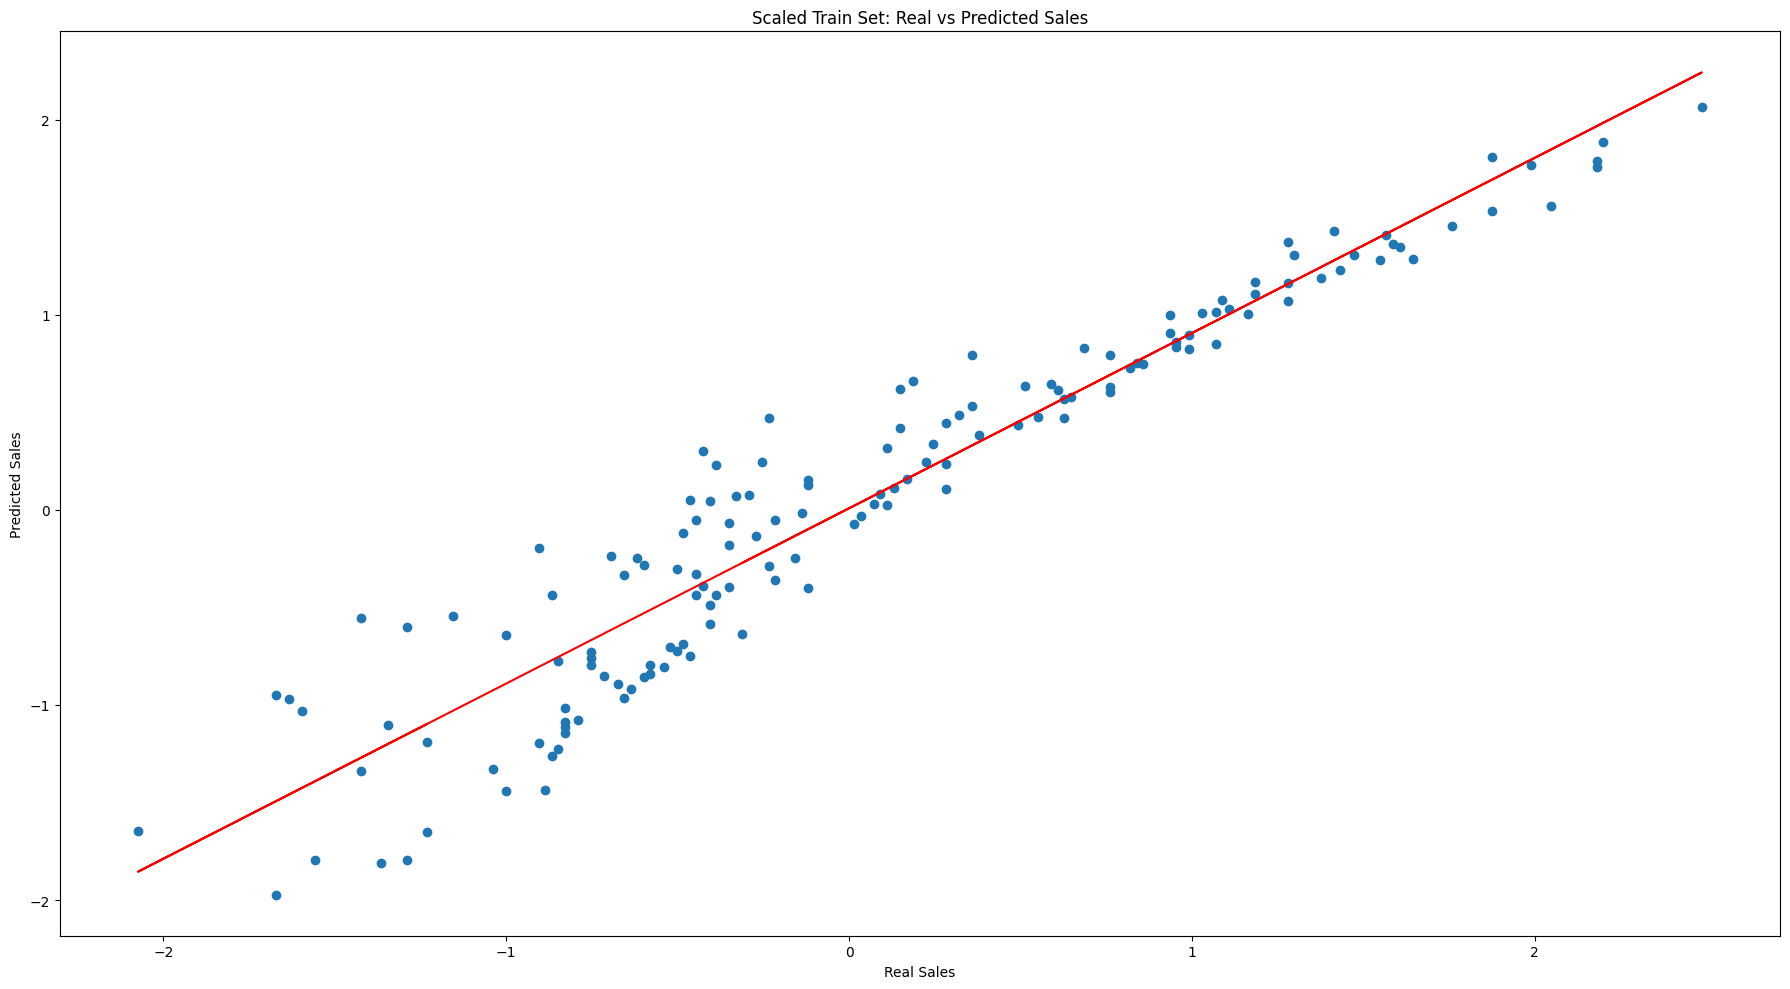

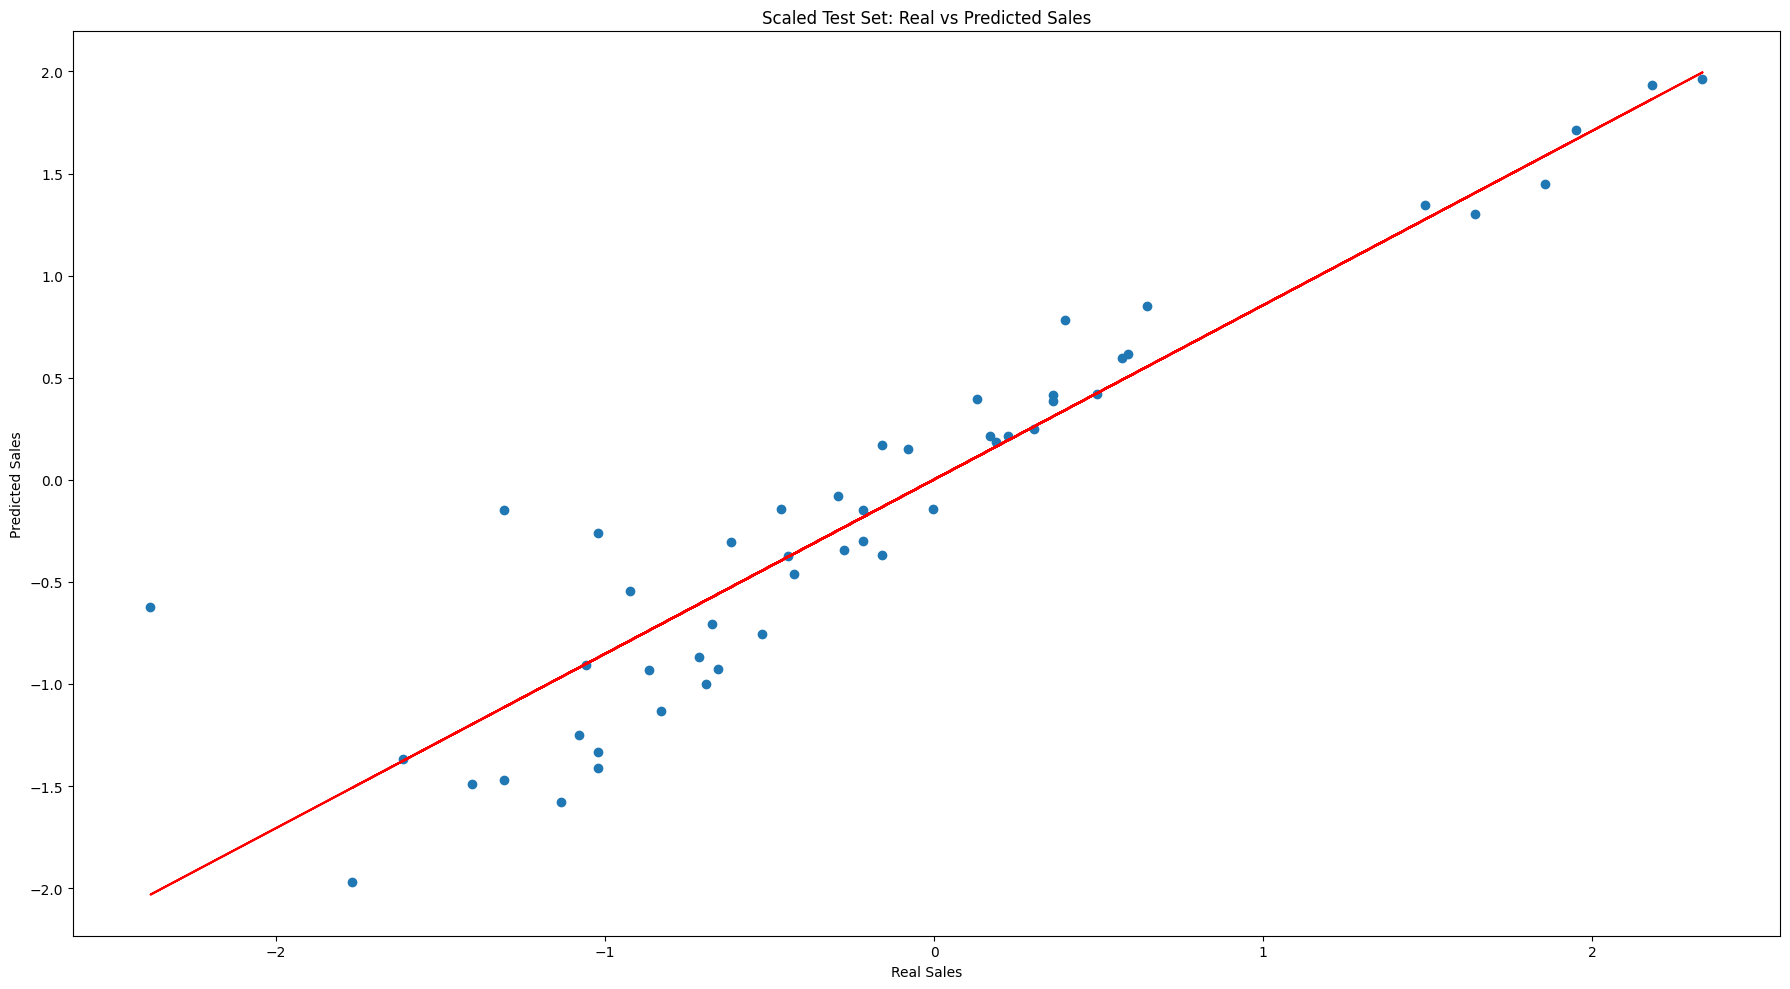

In [910]:
# train 
plt.scatter(y_train, y_train_pred)
plt.xlabel('Real Sales')
plt.ylabel('Predicted Sales')
plt.title('Scaled Train Set: Real vs Predicted Sales')

m, b = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, m*y_train + b, color='red')

plt.tight_layout()
plt.show()

# test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real Sales')
plt.ylabel('Predicted Sales')
plt.title('Scaled Test Set: Real vs Predicted Sales')

m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.tight_layout()
plt.show()

### Provide an r2 score (also available in sklearn).

In [911]:
print(f'r2_train: {r2_train}')
print(f'r2_test : {r2_test}')

r2_train: 0.9069353901540563
r2_test : 0.8559778373874033


### Is there a trend? 

There exists a linear positive trend on both plots, which is further illustrated by the diagonal regression lines presented.

The r^2 in the training set indicates that ~90.72% of the variability in response (Sales) is explained by the model using the predictors (TV, Radio, and Newspaper). The model has a strong fit to the training data.

The r^2 in the testing set indicates that ~85.76% of the variability in response (Sales) is explained by the model using the predictors (TV, Radio, and Newspaper). This is only a drop of ~4.96, indicating that the model has robust performance on unseen data and thus has good generalization. Additionally, the existence of a small drop implies that the model is not significantly overfitting.

Both ^2 values are well above 0.75, which is considered as 'very strong positive relationship' between the predicted and real values. This indicates that the model reliably captures the trends in the relationships between the predictors and the response.

## 3. 


### What happens as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

In [912]:
# gradient descent with history function

"""
Since other parameters must be constant, results are the same at the same nth iteration.
Hence we only need to store the results. This will improve performance.
"""

# function to store iteration history
def grad_descent_iteration_history(x, y, learning_rate, max_iteration, iteration_history):
    weights = initialize_weights()
    cost_history = []
    
    for num_iteration in range(max_iteration):
        y_hat = predict(x, weights)
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        gradient = compute_gradient(x, y, y_hat, learning_rate)
        weights = update_weights(weights, gradient)
        
        iteration_history['num_iterations'].append(num_iteration+1)
        iteration_history['weights'].append(weights)
        iteration_history['cost'].append(cost)

In [913]:
# store results
iteration_history = {
    'num_iterations': [],
    'weights': [],
    'cost': [],
    'mse_train': [],
    'mse_test': [],
    'r2_train': [],
    'r2_test': []
}

# parameters
learning_rate = 0.01
iteration_max = 50000

# run gradient descent
grad_descent_iteration_history(x_train, y_train, learning_rate, iteration_max, iteration_history)

# calculate metrics
for weight in iteration_history['weights']:
    y_train_pred = predict(x_train, weight)
    y_test_pred = predict(x_test, weight)
    
    mse_train = compute_cost(y_train, y_train_pred)
    mse_test = compute_cost(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    iteration_history['mse_train'].append(mse_train)
    iteration_history['mse_test'].append(mse_test)
    iteration_history['r2_train'].append(r2_train)
    iteration_history['r2_test'].append(r2_test)

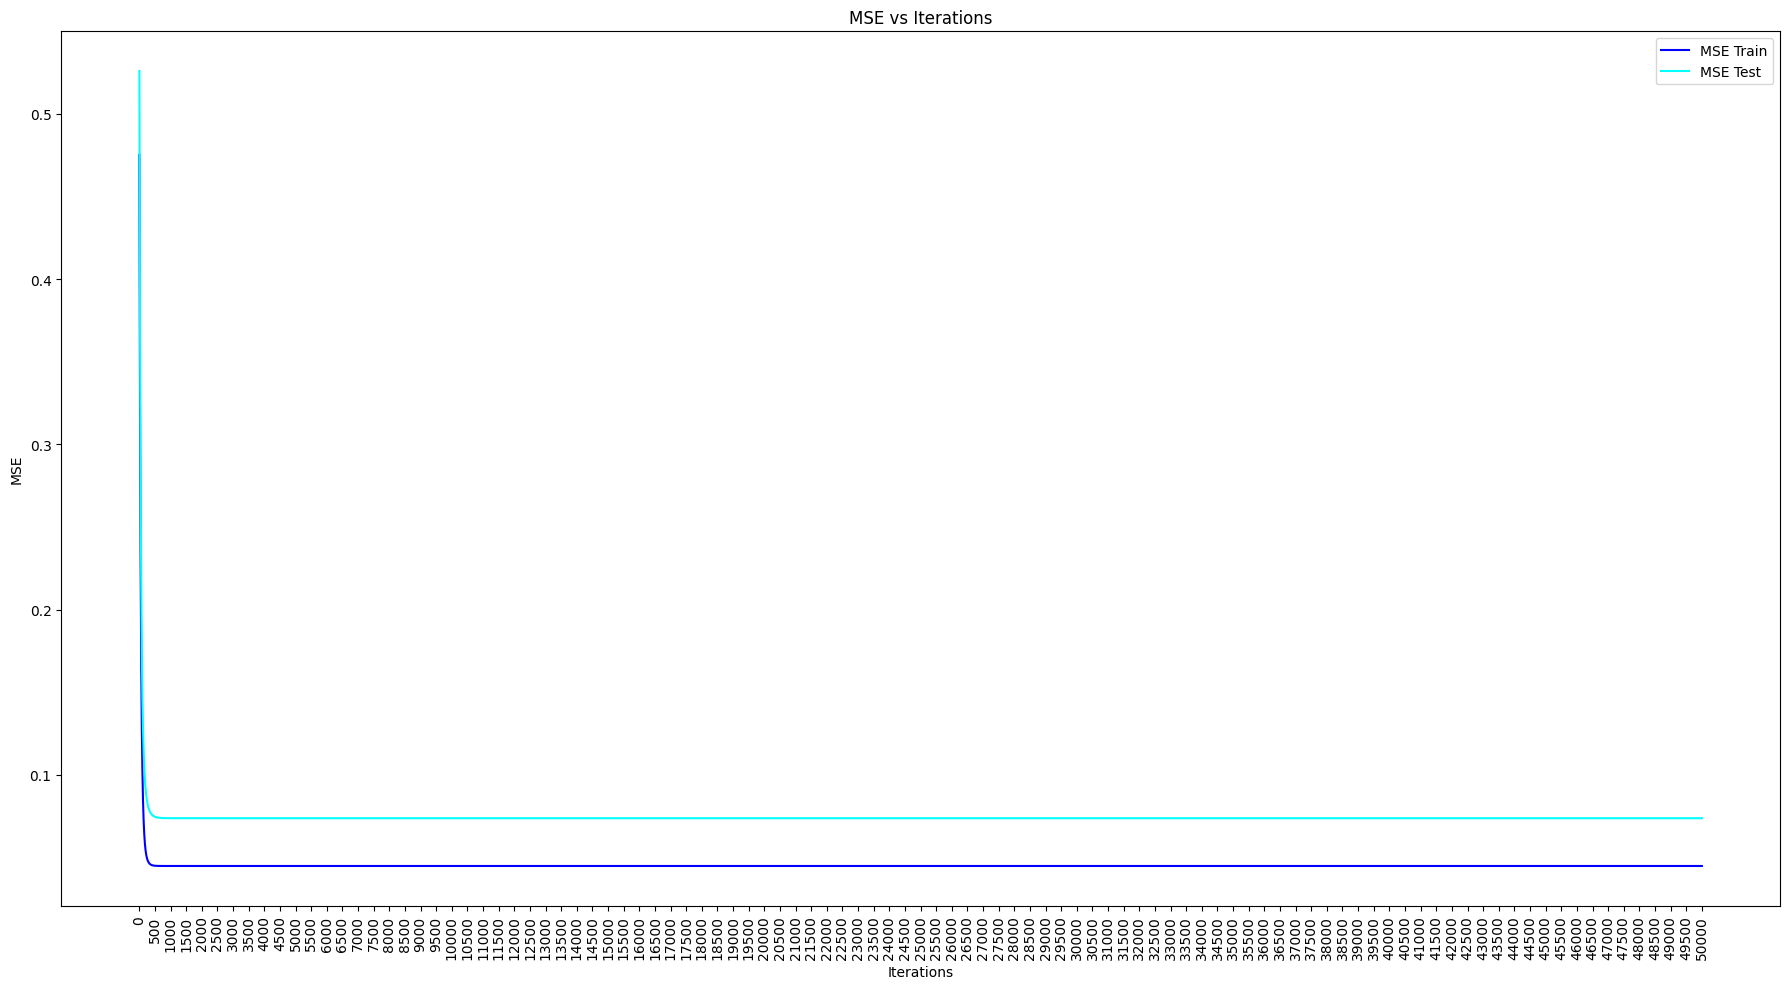

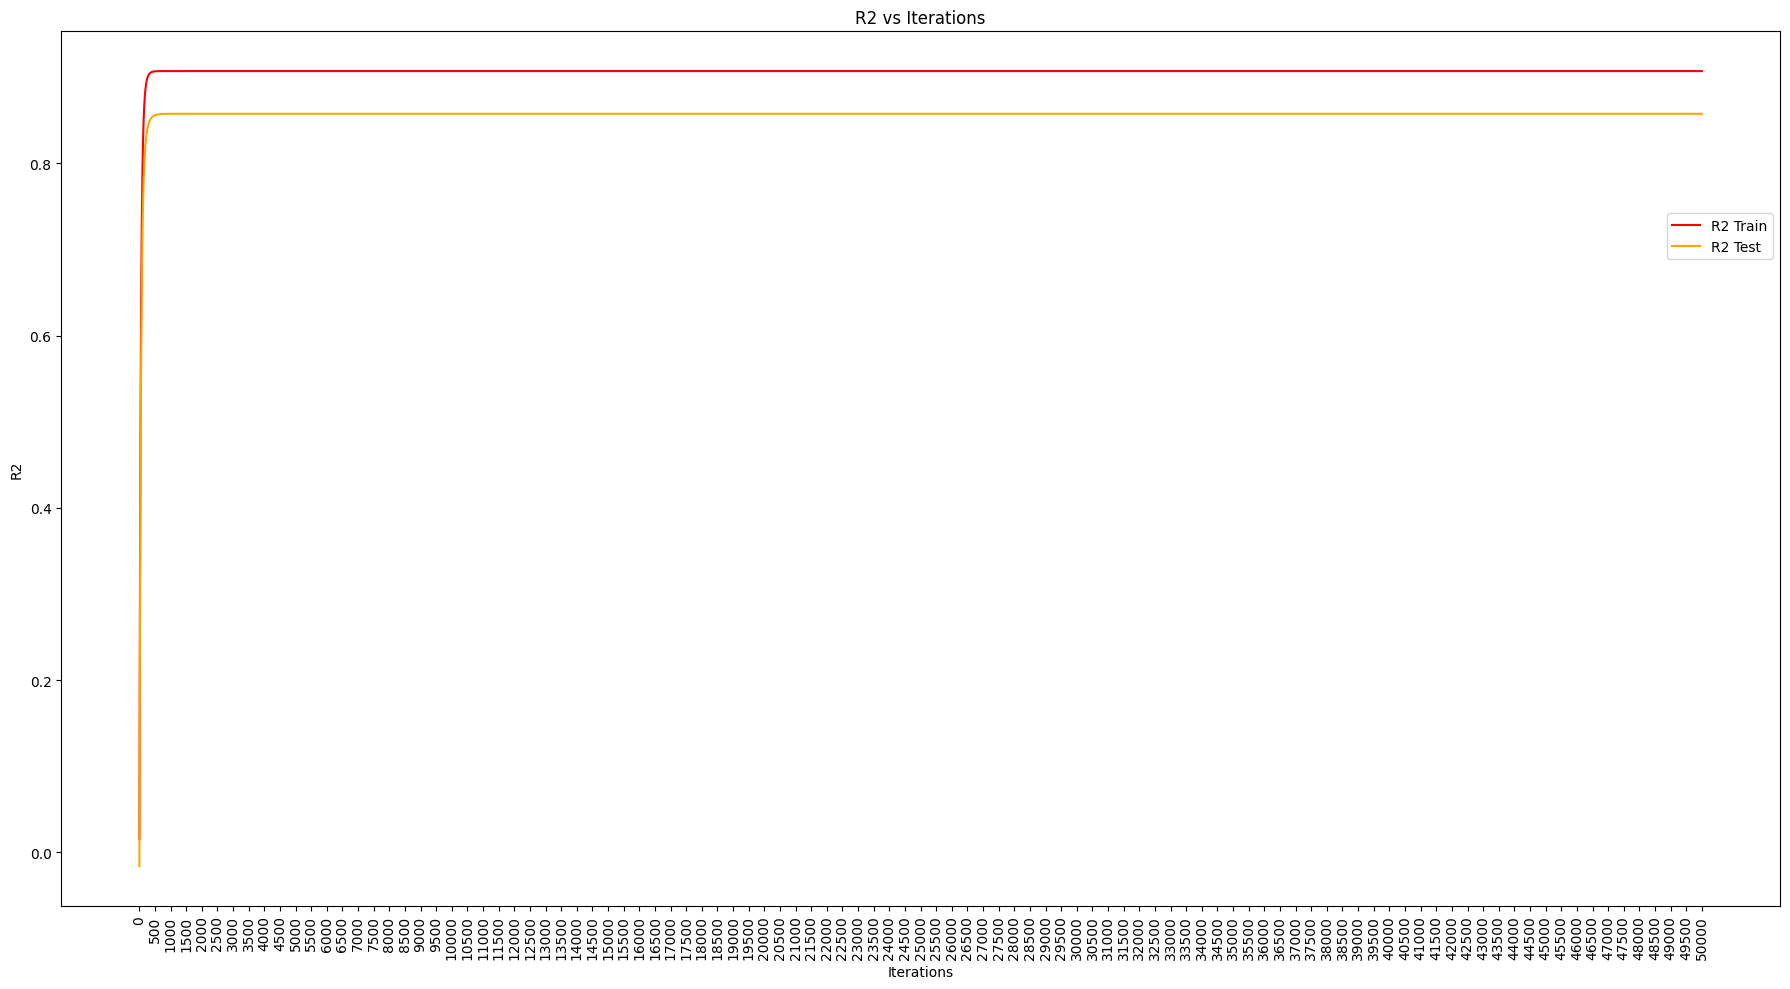

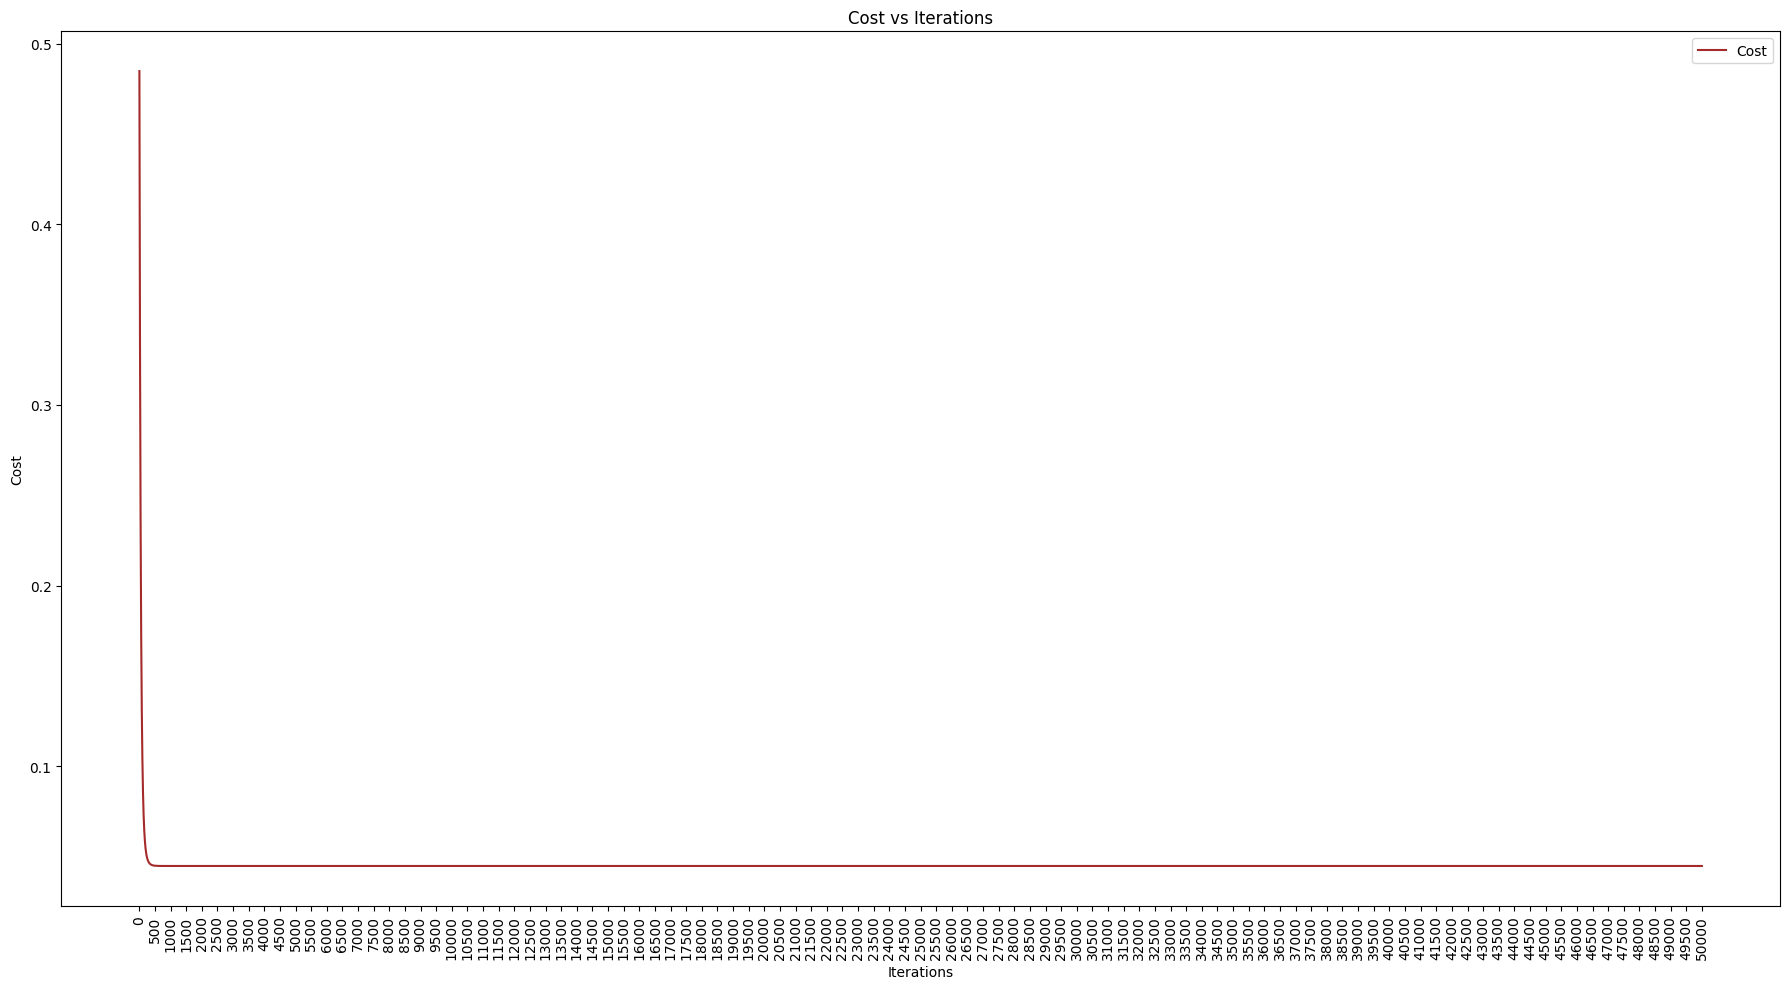

In [914]:
x_ticks = np.arange(0, iteration_max + 1, 500)

# plot MSE
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(iteration_history['num_iterations'], iteration_history['mse_train'], label='MSE Train', color='blue')
plt.plot(iteration_history['num_iterations'], iteration_history['mse_test'], label='MSE Test', color='cyan')
plt.xticks(x_ticks, rotation=90)
plt.legend()
plt.title('MSE vs Iterations')
plt.tight_layout()
plt.show()

# plot R2
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.plot(iteration_history['num_iterations'], iteration_history['r2_train'], label='R2 Train', color='red')
plt.plot(iteration_history['num_iterations'], iteration_history['r2_test'], label='R2 Test', color='orange')
plt.xticks(x_ticks, rotation=90)
plt.legend(bbox_to_anchor=(1,0.8))
plt.title('R2 vs Iterations')
plt.tight_layout()
plt.show()

# plot Cost
plt.plot(iteration_history['num_iterations'], iteration_history['cost'], label='Cost', color='brown')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.xticks(x_ticks, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [915]:
results_df = pd.DataFrame(iteration_history)
results_df

,num_iterations,weights,cost,mse_train,mse_test,r2_train,r2_test
0,1,bias 0.000630 tv 0.007385 ra...,0.484808,0.475088,0.525832,0.016018,-0.015708
1,2,bias 0.001249 tv 0.014692 ra...,0.475088,0.465593,0.516315,0.035684,0.002675
2,3,bias 0.001857 tv 0.021920 ra...,0.465593,0.456318,0.507018,0.054894,0.020634
3,4,bias 0.002454 tv 0.029072 ra...,0.456318,0.447257,0.497935,0.073661,0.038178
4,5,bias 0.003041 tv 0.036147 ra...,0.447257,0.438406,0.489062,0.091993,0.055318
...,...,...,...,...,...,...,...
49995,49996,bias 0.005550 tv 0.726700 ra...,0.044797,0.044797,0.073700,0.907218,0.857640
49996,49997,bias 0.005550 tv 0.726700 ra...,0.044797,0.044797,0.073700,0.907218,0.857640
49997,49998,bias 0.005550 tv 0.726700 ra...,0.044797,0.044797,0.073700,0.907218,0.857640
49998,49999,bias 0.005550 tv 0.726700 ra...,0.044797,0.044797,0.073700,0.907218,0.857640


In [916]:
# convergence functions
def find_convergence(metric):
    convergence_threshold = 1e-6
    convergence_iteration = None

    for i in range(1, len(iteration_history[metric])):
        if abs(iteration_history[metric][i - 1] - iteration_history[metric][i]) < convergence_threshold:
            convergence_iteration = i
            break

    return convergence_iteration

In [917]:
# find convergence for all metrics
metrics = list(iteration_history.keys())[2:]

for metric in metrics:
    convergence_iteration = find_convergence(metric)
    print(f'{metric.title()} converges at iteration: {convergence_iteration}')

Cost converges at iteration: 545
Mse_Train converges at iteration: 544
Mse_Test converges at iteration: 729
R2_Train converges at iteration: 600
R2_Test converges at iteration: 807


### What happens to the error, r2, and cost as the number of iterations increase? 

The graphs illustrate that as the number of iterations increase, the smaller the difference between each metric and their predecessor. We can also see that the model has hit convergence for all its metrics. Cost convergence was hit at iteration 545, mse_train convergence was hit at iteration 544, mse_test convergence was hit at iteration 729, r2_train convergence was hit at iteration 600, and r2_test convergence was hit at iteration 807. Hitting convergence indicates that the model will receive negligent improvement, which I defined as less than 0.00001 difference, with more iterations in training.

With the convergences found from my model, I determine my optimal number of iterations to be 600 since that was when r2_train converged. I chose r2_train as my basis because I want a high coefficient of determination since it indicates the level of fit for the train set data. Test set data is unpredictable hence it is not a good basis. Additionally, according to Kumar (2023), the r^2 metric is more recommended when determining performance of a regression model.

Kumar, A. (2023 Dec 29). *Mean Squared Error or R-Squared – Which one to use?* https://vitalflux.com/mean-square-error-r-squared-which-one-to-use

### 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.


### 5. Is there a relationship on the learning rate and the number of iterations?


### 6. Compare the results with the results of ordinary least squares function. 